<a href="https://colab.research.google.com/github/Kaidus23/Skills-Assessment-2/blob/main/Geographycal_Distribution1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**(1) Importing Drive**

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**(2) Importing library files**

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import plotly.express as px

**(3) Heatmap visualization of Research Activity**

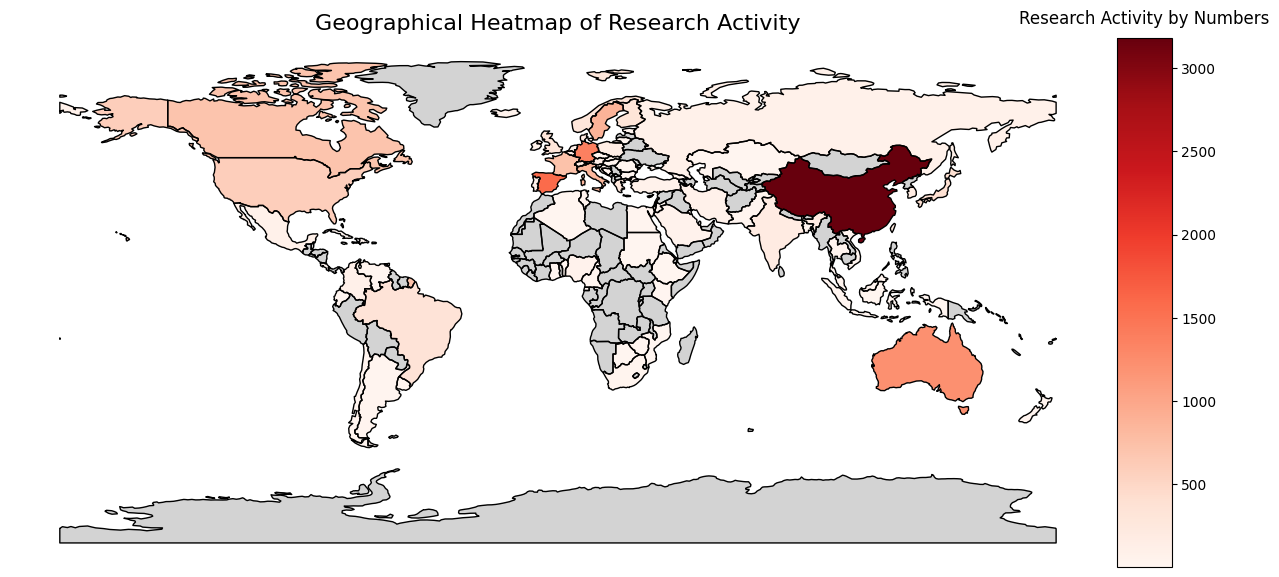

In [34]:
# Load the CSV file with authors and affiliations
authors_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assesment/Skills for Data Scientist/Group 4/authors.APOE.csv')

# Extract country names from AuthorAffiliation using regex
def extract_country(affiliation):
    import re
    match = re.search(r',\s*([A-Za-z\s]+)\.?$', affiliation)
    return match.group(1).strip() if match else None

authors_df['Country'] = authors_df['AuthorAffiliation'].dropna().apply(extract_country)

# Count occurrences of each country
country_counts = authors_df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

# --- Load the world shapefile ---
# Update the shapefile path to point to the correct location
shapefile_path = '/content/drive/MyDrive/Colab Notebooks/Assesment/Skills for Data Scientist/Group 4/ne_110m_admin_0_countries.zip (Unzipped Files)/ne_110m_admin_0_countries.shp'
world = gpd.read_file(shapefile_path)

# --- Merge data for visualization ---
# Ensure we use the correct column from the world GeoDataFrame for merging
world = world.merge(country_counts, left_on='ADMIN', right_on='Country', how='left')

# --- Plot the heatmap ---
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
# Add a color bar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Plotting country boundaries
world.boundary.plot(ax=ax, linewidth=1, color="black")

# Plotting the heatmap
plot = world.plot(
    column='Count',
    ax=ax,
    legend=True,
    cax=cax,
    cmap='Reds',
    missing_kwds={"color": "lightgrey", "label": "No Data"}
)

# Addding title to the colorbar
cax.set_title('Research Activity by Numbers', fontsize=12, pad=10)  # Title with padding

# Addding titles and cleaning up
ax.set_title('Geographical Heatmap of Research Activity', fontsize=16)
ax.set_axis_off()

# To show the plot
plt.show()

